In [2]:

import pandas as pd

# Load the feature file
df = pd.read_csv("/content/calendar_day_features_with_momentum (1).csv")

# Ensure temporal order by sorting by Date
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df = df.sort_values("Date").reset_index(drop=True)

# Split into train/test sets (80/20)
split_index = int(len(df) * 0.8)
train = df.iloc[:split_index]
test = df.iloc[split_index:]

# Save the datasets
train.to_csv("train_dataset.csv", index=False)
test.to_csv("test_dataset.csv", index=False)

print("Train and test datasets have been created and saved.")


Train and test datasets have been created and saved.


/tmp/ipython-input-552576804.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)


In [3]:
train

,Date,Symbol,Close,Volume,day_of_week,is_weekend,days_since_last_trade,Daily_Return,Volatility_5d,Volatility_20d,Price_momentum,Return_momentum,Volume_momentum,Volatility_change
0,2020-08-26,GOOGL,81.716423,52188000.0,2,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-27,GOOGL,80.940567,31350000.0,3,False,0,-0.009494,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-08-28,GOOGL,81.482819,22418000.0,4,False,0,0.006699,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-08-29,GOOGL,81.482819,NaN,5,True,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-08-30,GOOGL,81.482819,NaN,6,True,2,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2024-08-18,GOOGL,162.174423,NaN,6,True,2,0.000000,0.012872,0.014488,-1.194214,-0.006997,NaN,-0.001615
1454,2024-08-19,GOOGL,165.866531,22416200.0,0,False,0,0.022766,0.009432,0.015454,6.269623,0.038857,NaN,-0.006022
1455,2024-08-20,GOOGL,166.374069,18341500.0,1,False,0,0.003060,0.009653,0.015363,5.851654,0.036118,NaN,-0.005710
1456,2024-08-21,GOOGL,165.050476,22902000.0,2,False,0,-0.007956,0.011479,0.015421,2.876053,0.017871,NaN,-0.003942


In [4]:
test

,Date,Symbol,Close,Volume,day_of_week,is_weekend,days_since_last_trade,Daily_Return,Volatility_5d,Volatility_20d,Price_momentum,Return_momentum,Volume_momentum,Volatility_change
1458,2024-08-23,GOOGL,164.821579,13955700.0,4,False,0,0.011111,0.014247,0.014962,2.647156,0.016621,0.697027,-0.000714
1459,2024-08-24,GOOGL,164.821579,NaN,5,True,1,0.000000,0.009238,0.014962,-1.044952,-0.006145,NaN,-0.005724
1460,2024-08-25,GOOGL,164.821579,NaN,6,True,2,0.000000,0.008980,0.010750,-1.552490,-0.009205,NaN,-0.001770
1461,2024-08-26,GOOGL,165.358978,14190400.0,0,False,0,0.003260,0.008457,0.010584,0.308502,0.002011,NaN,-0.002127
1462,2024-08-27,GOOGL,163.886124,11821900.0,1,False,0,-0.008907,0.007202,0.010875,0.875763,0.005465,NaN,-0.003673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,2025-08-18,GOOGL,203.500000,18526600.0,0,False,0,-0.001962,0.003088,0.011685,1.539993,0.007621,NaN,-0.008596
1819,2025-08-19,GOOGL,201.570007,24240200.0,1,False,0,-0.009484,0.005176,0.011950,-1.369995,-0.006715,NaN,-0.006774
1820,2025-08-20,GOOGL,199.320007,28955500.0,2,False,0,-0.011162,0.005389,0.010863,-4.579987,-0.022608,NaN,-0.005474
1821,2025-08-21,GOOGL,199.750000,19774600.0,3,False,0,0.002157,0.005903,0.010156,-4.149994,-0.020451,NaN,-0.004252


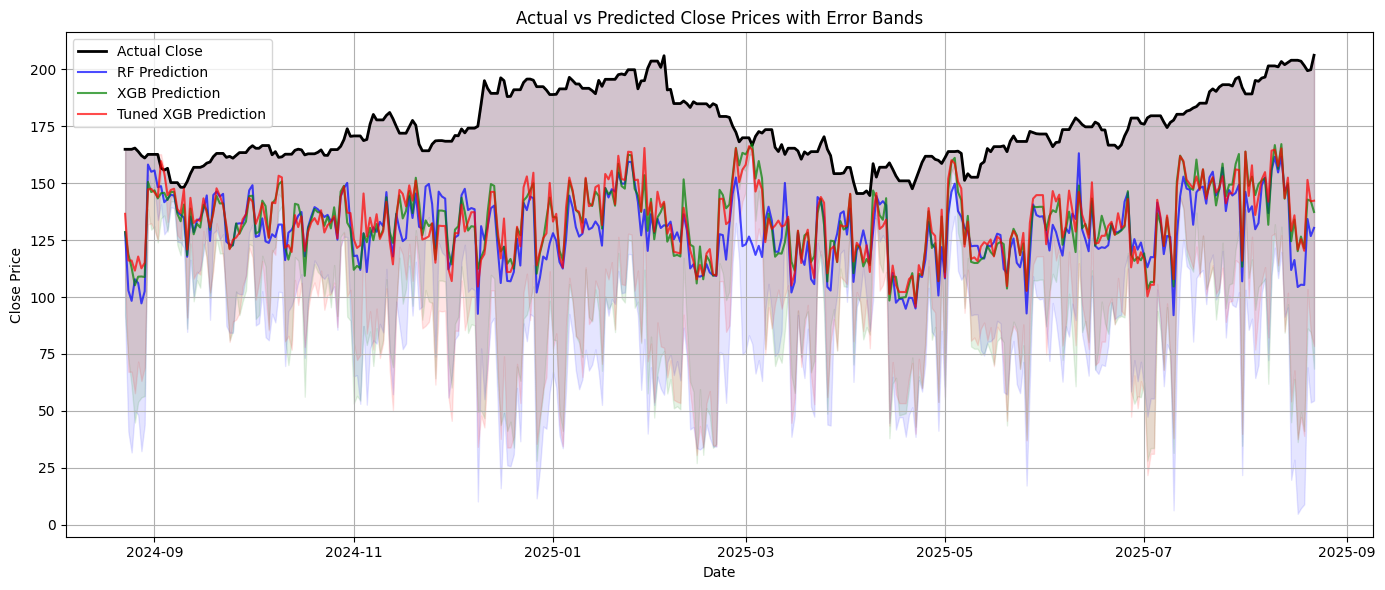

In [6]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the actual and predicted data
actual_df = pd.read_csv("/content/test_dataset.csv")
pred_df = pd.read_csv("/content/model_predictions (1).csv")

# Ensure date formats are consistent
actual_df["Date"] = pd.to_datetime(actual_df["Date"])
pred_df["Date"] = pd.to_datetime(pred_df["Date"], format="%d-%m-%y")

# Merge actual and predicted data on Date
merged_df = pd.merge(actual_df[["Date", "Close"]], pred_df[["Date", "RF_Pred", "XGB_Pred", "Tuned_XGB_Pred"]], on="Date")

# Calculate prediction errors
merged_df["RF_Error"] = merged_df["Close"] - merged_df["RF_Pred"]
merged_df["XGB_Error"] = merged_df["Close"] - merged_df["XGB_Pred"]
merged_df["Tuned_XGB_Error"] = merged_df["Close"] - merged_df["Tuned_XGB_Pred"]

# Plot actual vs predicted with error bands
plt.figure(figsize=(14, 6))
plt.plot(merged_df["Date"], merged_df["Close"], label="Actual Close", color="black", linewidth=2)
plt.plot(merged_df["Date"], merged_df["RF_Pred"], label="RF Prediction", color="blue", alpha=0.7)
plt.plot(merged_df["Date"], merged_df["XGB_Pred"], label="XGB Prediction", color="green", alpha=0.7)
plt.plot(merged_df["Date"], merged_df["Tuned_XGB_Pred"], label="Tuned XGB Prediction", color="red", alpha=0.7)

# Add error bands
plt.fill_between(merged_df["Date"], merged_df["RF_Pred"] - merged_df["RF_Error"].abs(), merged_df["RF_Pred"] + merged_df["RF_Error"].abs(), color="blue", alpha=0.1)
plt.fill_between(merged_df["Date"], merged_df["XGB_Pred"] - merged_df["XGB_Error"].abs(), merged_df["XGB_Pred"] + merged_df["XGB_Error"].abs(), color="green", alpha=0.1)
plt.fill_between(merged_df["Date"], merged_df["Tuned_XGB_Pred"] - merged_df["Tuned_XGB_Error"].abs(), merged_df["Tuned_XGB_Pred"] + merged_df["Tuned_XGB_Error"].abs(), color="red", alpha=0.1)

plt.title("Actual vs Predicted Close Prices with Error Bands")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.grid(True)

# Save the plot
plt.savefig("actual_vs_predicted_with_error_bands.png")
plt.show()


ข้อสังเกตจากกราฟ
โมเดลมีแนวโน้มคาดต่ำกว่าค่าจริงในช่วงที่ราคาพุ่งสูง
Tuned XGB มีความแม่นยำมากขึ้นในบางช่วง แต่ยังมี bias ในช่วง volatility สูง
Error bands ช่วยให้เห็นว่าความคลาดเคลื่อนมีขนาดเท่าใดในแต่ละวัน